<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise1(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [27]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalization
x_train, x_test = x_train /255.0, x_test / 255.0

# Data expanding (CNN for 28x28x1 format)
x_train = np.expand_dims(x_train, axis=-1)  # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)


In [29]:
# CNN function (MNIST - input_shape)
def create_cnn(activation_function, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax') # Çıkış katmanı
    ])
    return model

In [30]:
# Train and Validation function
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    # Model optimize
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Modeli train
    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)

    return history

In [31]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Validation plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


Testing Activation Function: sigmoid
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5204 - loss: 1.3562 - val_accuracy: 0.9644 - val_loss: 0.1237
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9683 - loss: 0.1092 - val_accuracy: 0.9803 - val_loss: 0.0672
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0668 - val_accuracy: 0.9834 - val_loss: 0.0554
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0496 - val_accuracy: 0.9876 - val_loss: 0.0379
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0389 - val_accuracy: 0.9862 - val_loss: 0.0382
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.9886 - val_loss: 0.0365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9885 - val_loss: 0.0340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/s

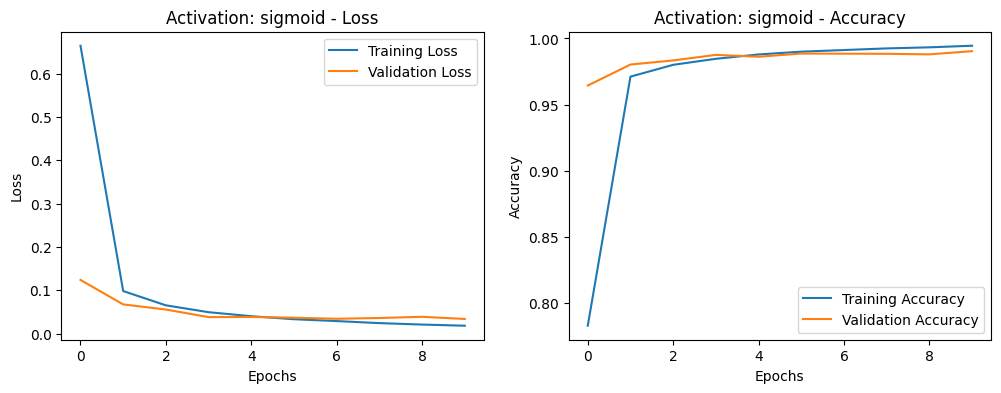


Testing Activation Function: tanh
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9182 - loss: 0.2760 - val_accuracy: 0.9832 - val_loss: 0.0582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9873 - val_loss: 0.0403
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9875 - val_loss: 0.0406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9877 - val_loss: 0.0379
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9870 - val_loss: 0.0399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9894 - val_loss: 0.0355
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9901 - val_loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step -

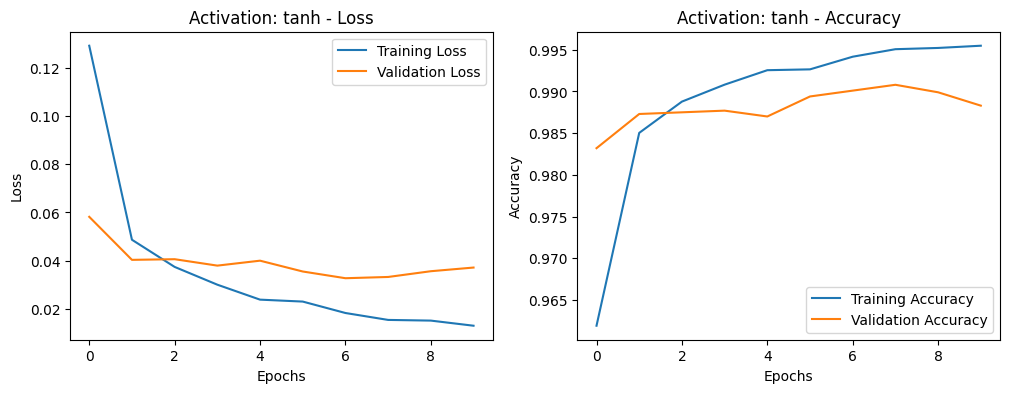


Testing Activation Function: relu
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8937 - loss: 0.3380 - val_accuracy: 0.9840 - val_loss: 0.0502
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9850 - loss: 0.0475 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9892 - loss: 0.0352 - val_accuracy: 0.9862 - val_loss: 0.0464
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9929 - loss: 0.0237 - val_accuracy: 0.9917 - val_loss: 0.0298
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0194 - val_accuracy: 0.9901 - val_loss: 0.0305
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9962 - loss: 0.0142 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/s

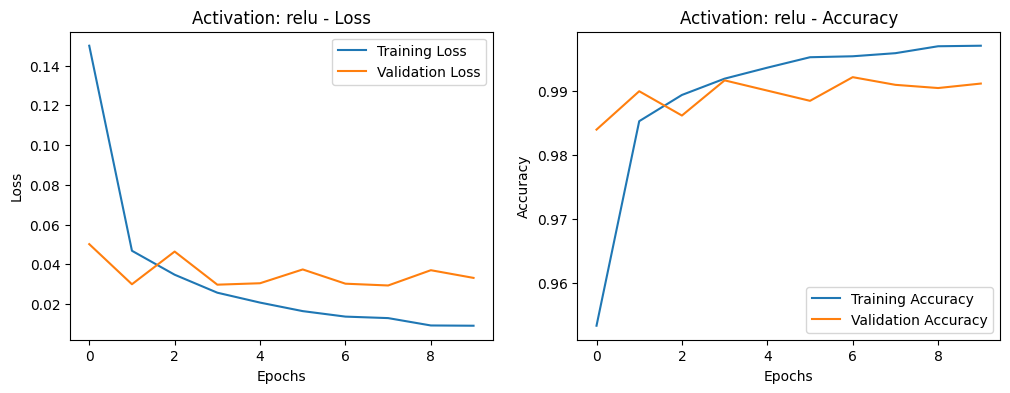


Testing Activation Function: elu
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9162 - loss: 0.2820 - val_accuracy: 0.9855 - val_loss: 0.0445
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9841 - loss: 0.0523 - val_accuracy: 0.9854 - val_loss: 0.0451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9891 - val_loss: 0.0349
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0274 - val_accuracy: 0.9859 - val_loss: 0.0460
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9882 - val_loss: 0.0373
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9906 - val_loss: 0.0466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9872 - val_loss: 0.0525
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

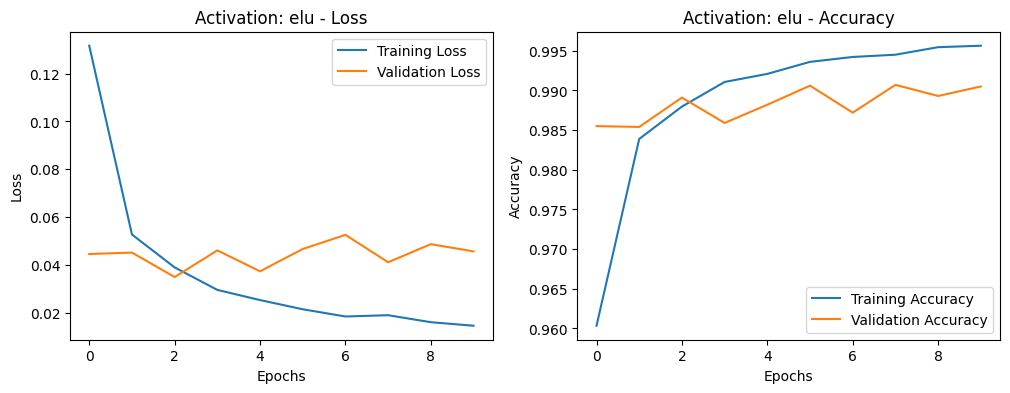


Testing Activation Function: selu
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9169 - loss: 0.2725 - val_accuracy: 0.9780 - val_loss: 0.0694
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0652 - val_accuracy: 0.9835 - val_loss: 0.0490
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0465 - val_accuracy: 0.9850 - val_loss: 0.0453
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9866 - val_loss: 0.0464
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9899 - loss: 0.0302 - val_accuracy: 0.9869 - val_loss: 0.0534
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9851 - val_loss: 0.0534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0226 - val_accuracy: 0.9868 - val_loss: 0.0622
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

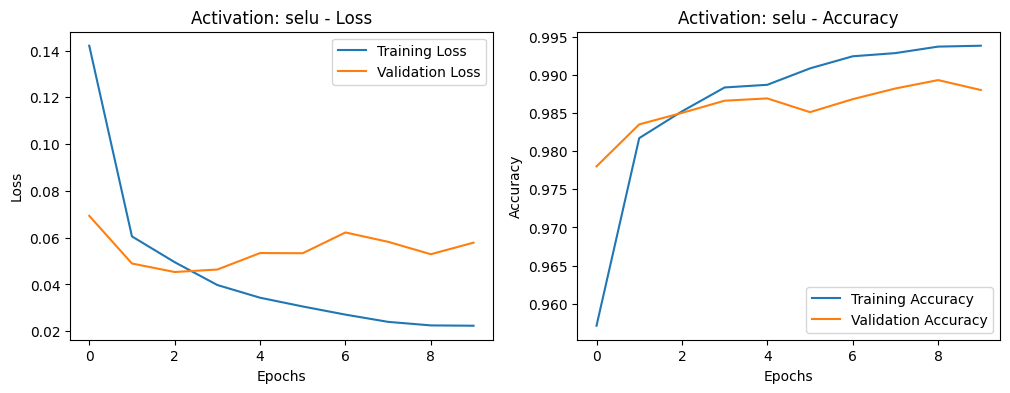

In [32]:
# Activation function list
activations = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']
input_shape = (28, 28, 1)

# Loop activation
for activation in activations:
    print(f'\nTesting Activation Function: {activation}')
    # create model
    model = create_cnn(activation, input_shape=input_shape)

    # train model
    history = train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10)

    # plot result
    plot_results(history, f'Activation: {activation}')
